You spin a wheel and it randomly lands on \$1, \$2, or END. If you land on \$1 or \$2, you bank the money and spin the wheel again. You keep spinning until you land on END, at which point you cash out the money you banked. How much do you expect to win on average?

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[<matplotlib.text.Text at 0xb61ba90>, <matplotlib.text.Text at 0xb61b208>]

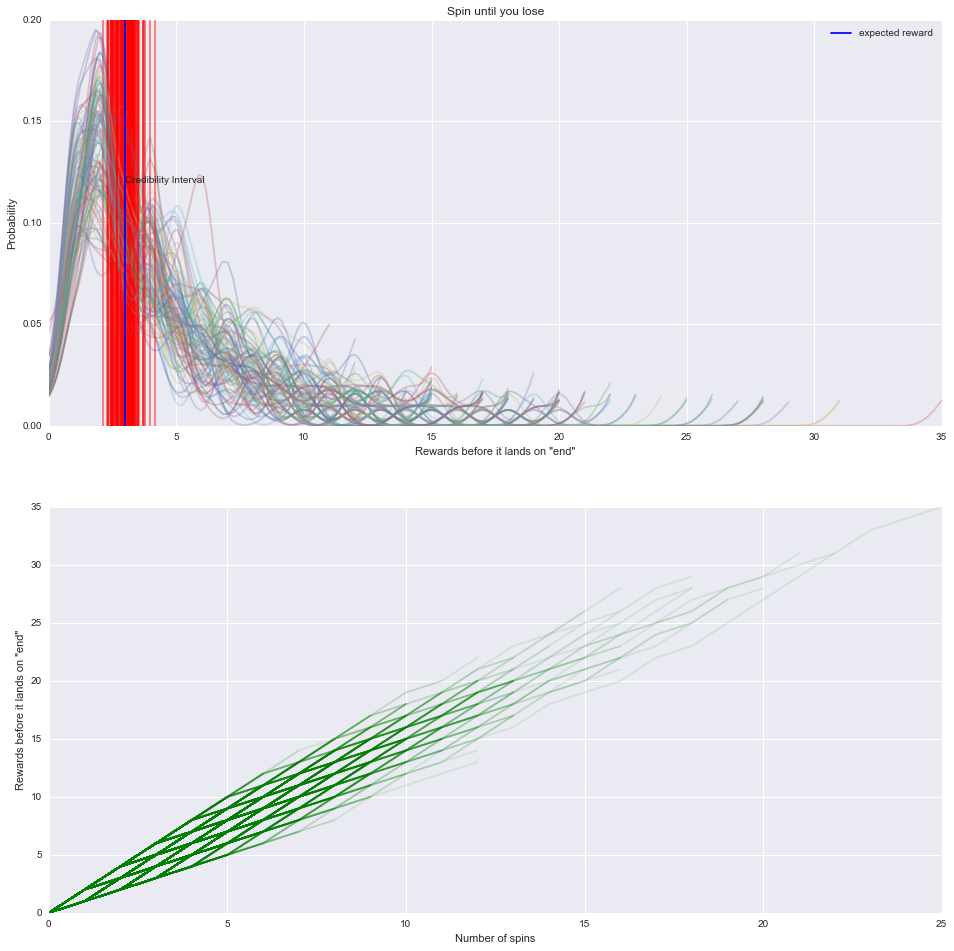

In [3]:
cases = ['1','2','end']
doTime = 100
simTimes = 500; fig,ax = plt.subplots(2,1,figsize=(16,16))
for jj in range(doTime):
    simulation = {'bank':[],'bank_list':[]}
    for ii in range(simTimes):
        place = True;bank = 0;bank_list=[0]
        while place:
            land_on = np.random.choice(cases,1)[0]
            try:
                bank += int(land_on)
                bank_list.append(int(land_on))
                place = True
            except:
                simulation['bank'].append(bank)
                simulation['bank_list'].append(bank_list)
                ax[1].plot(np.cumsum(bank_list),color='green',alpha=0.1)
                place = False
    ax[0]=sns.kdeplot(np.array(simulation['bank']),cut=0,bw=0.5,
                      ax=ax[0],alpha=0.3)
    ax[0].axvline(np.array(simulation['bank']).mean(),color='r',alpha=0.5)
    
    
ax[0].axvline(3,label='expected reward')
ax[0].legend()
ax[0].annotate('Credibility Interval',xy=(3,0.12))
ax[0].set(xlabel='Rewards before it lands on "end"',ylabel='Probability',
      title='Spin until you lose')
ax[1].set(xlabel='Number of spins',ylabel='Rewards before it lands on "end"',
         )

What if the wheel has values \$1, \$2, ..., $N with the same rules? How much do you expect to win now?

so then the bank noticed they were losing too much money, and they changed the rules. now, if you get "end", you lose all your winnings, but you can stop the game any time you want between spins and take your winnings home. if you want to make the highest average money, when should you stop spinning?﻿

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[<matplotlib.text.Text at 0x1ff8e828>, <matplotlib.text.Text at 0x1bcf9f98>]

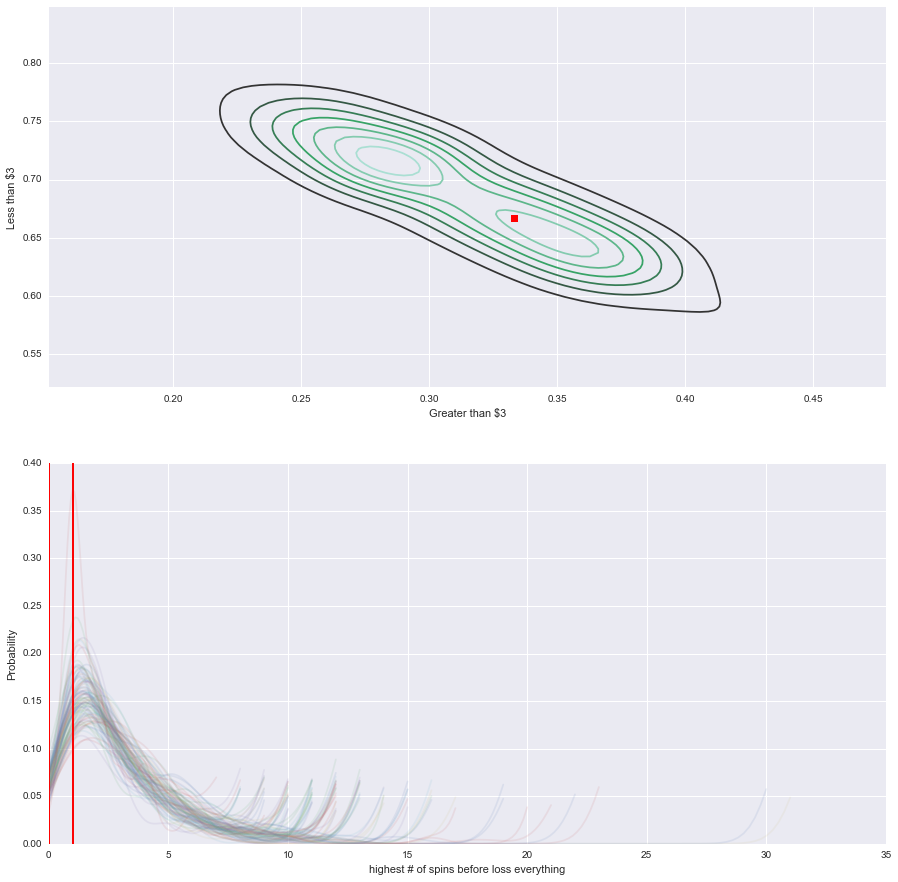

In [53]:
result=[];spins=[]
fig,ax=plt.subplots(2,1,figsize=(15,15))
for jj in range(doTime):
    simulation = {'bank':[],'bank_list':[],'bank_mean':[],'spin':[]}
    for ii in range(simTimes):
        place=True;bank = 0; bank_list=[0]
        while place:
            land_on = np.random.choice(cases,1)[0]
            try:
                bank += int(land_on)
                bank_list.append(int(land_on))
                place = True
            except:
                simulation['bank'].append(bank)
                bank_list = np.concatenate(( np.cumsum(bank_list),[0]))
                simulation['bank_mean'].append(bank_list[-2]/(len(bank_list)-1))
                simulation['bank_list'].append(bank_list)
                simulation['spin'].append(len(bank_list)-2)
                place = False
    G3=len(np.where(np.array(simulation['bank'])> 3)[0])/len(simulation['bank'])
    L3=len(np.where(np.array(simulation['bank'])<=3)[0])/len(simulation['bank'])
    ax[1]=sns.kdeplot(np.array(simulation['spin']),ax=ax[1],cut=0,alpha=0.1)
    _=ax[1].axvline(stats.mode(simulation['spin'])[0],color='r',alpha=0.3)
    result.append([G3,L3])
    spins.append(np.mean(simulation['spin']))
result = np.array(result)
ax[0]=sns.kdeplot(result[:,0],result[:,1],ax=ax[0]) 
ax[0].set(xlabel='Greater than $3', ylabel='Less than $3')
ax[0].plot(1/3,2/3,'rs')
ax[1].set(xlabel='highest # of spins before loss everything',
         ylabel='Probability')


[<matplotlib.text.Text at 0x1c955160>, <matplotlib.text.Text at 0x1c8d7c18>]

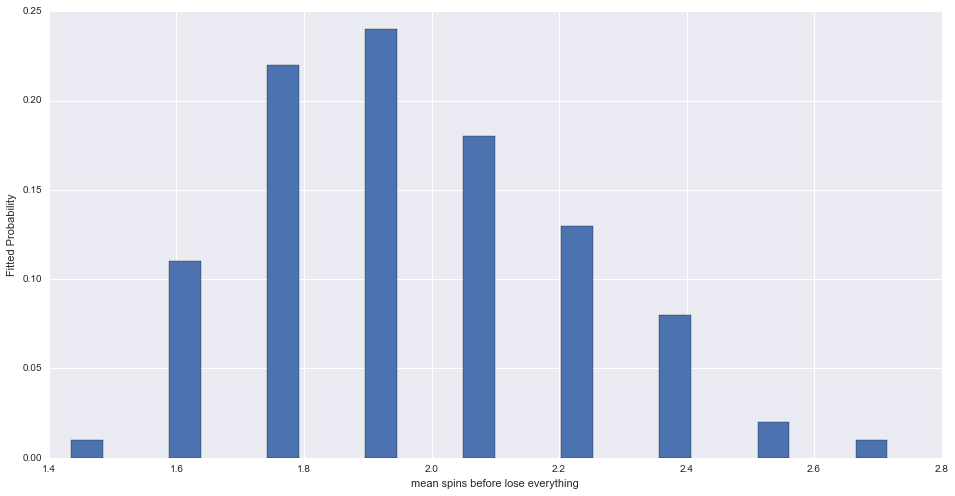

In [65]:
fig,ax=plt.subplots(figsize=(16,8))
aus_bins = np.histogram(spins, bins=9)[0]
ax.bar(np.linspace(np.min(spins),np.max(spins),9),aus_bins.astype(np.float)/np.sum(aus_bins),width=0.05,
      align='center')
ax.set(xlabel='mean spins before lose everything',ylabel='Fitted Probability')